## Grover's Algorithm

In [1]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.providers.basic_provider import BasicSimulator
import qiskit.circuit.library as qulib

In [2]:
def Uf(n, num, cz_gate):
    qc = QuantumCircuit(n)
    
    for i in range(n):
        if num[i] == '0':
            qc.x(i)

    qc.append(cz_gate, [i for i in range(n)])
    
    for i in range(n):
        if num[i] == '0':
            qc.x(i)

    qc.to_gate()
    qc.name = 'Uf'
    return qc

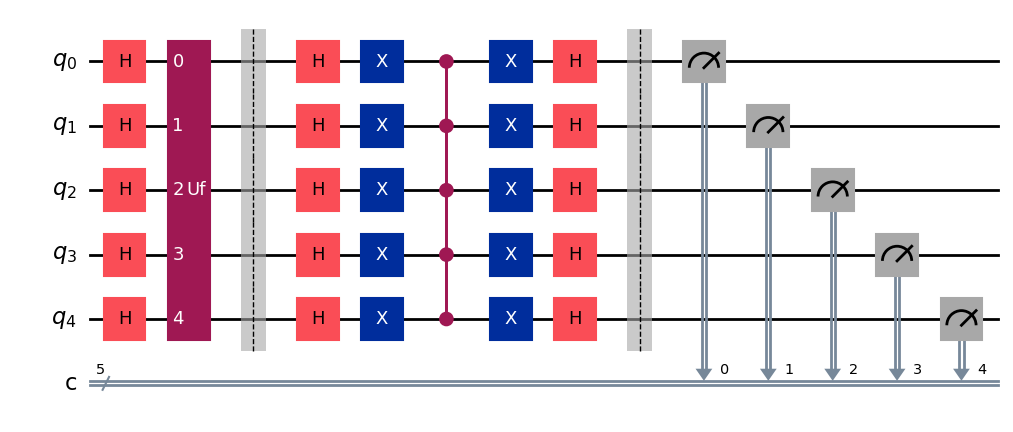

In [3]:
n = 5 # number of qubits 

num = 13 # number to find
num = np.binary_repr(num, n)[::-1] # binary representation of num

qc = QuantumCircuit(n, n)

qc.h(range(n)) # superposition

q_ctrl = ''
for i in range(n - 1):
    q_ctrl += '1'

cz_gate = qulib.ZGate().control(n - 1, ctrl_state = q_ctrl)

qc.append(Uf(n, num, cz_gate), range(n)) # Uf

qc.barrier()

# ------------------------------------------------
# Us

qc.h(range(n))
qc.x(range(n))

qc.append(cz_gate, range(n))

qc.x(range(n))
qc.h(range(n))

# ------------------------------------------------

qc.barrier()

qc.measure(range(n), range(n))
    
qc.draw('mpl')
#print(st)

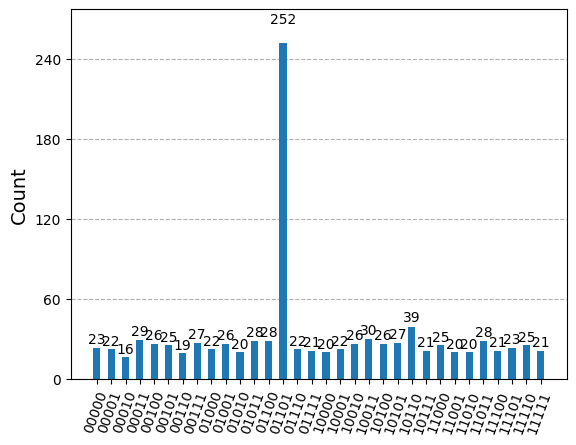

In [4]:
simulator_basic = BasicSimulator()
compile = transpile(qc, simulator_basic)
job = simulator_basic.run(compile, shots =  1000)

# Run the circuit 
result = job.result()

display(plot_histogram(result.get_counts()))